In [2]:
import pandas as pd

In [3]:
# Get data from CSV files

city_list = pd.read_csv('city_list.csv')
city_data = pd.read_csv('city_data.csv')
global_data = pd.read_csv('global_data.csv')

In [4]:
# View data structures

print(city_list.head(), '\n')
print(city_data.head(), '\n')
print(global_data.head(), '\n')

        city               country
0    Abidjan         Côte D'Ivoire
1  Abu Dhabi  United Arab Emirates
2      Abuja               Nigeria
3      Accra                 Ghana
4      Adana                Turkey 

   year     city        country  avg_temp
0  1849  Abidjan  Côte D'Ivoire     25.58
1  1850  Abidjan  Côte D'Ivoire     25.52
2  1851  Abidjan  Côte D'Ivoire     25.67
3  1852  Abidjan  Côte D'Ivoire       NaN
4  1853  Abidjan  Côte D'Ivoire       NaN 

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47 



In [5]:
# Check for nearest major city

city_list[city_list['city'] == 'Houston']

,city,country
124,Houston,United States


In [6]:
# Get Houston data
houston_data = city_data[city_data['city'] == 'Houston']
print(houston_data.head(), '\n')

# Isolate years not common in both datasets
disjoint_temps = list(set(global_data['year']).symmetric_difference(set(houston_data['year'])))

# Remove disjoint features from datasets
houston_data = houston_data[~ houston_data['year'].isin(disjoint_temps)]
global_data = global_data[~ global_data['year'].isin(disjoint_temps)]
del houston_data['city'], houston_data['country']

print(houston_data.shape, global_data.shape)

       year     city        country  avg_temp
25952  1820  Houston  United States     19.11
25953  1821  Houston  United States     19.57
25954  1822  Houston  United States     20.05
25955  1823  Houston  United States     19.62
25956  1824  Houston  United States     20.19 

(194, 2) (194, 2)


In [44]:
# Calculate the moving average (5 years) of each dataset 

houston_data['moving_avg'] = houston_data['avg_temp'].rolling(7).mean()
global_data['moving_avg'] = global_data['avg_temp'].rolling(7).mean()

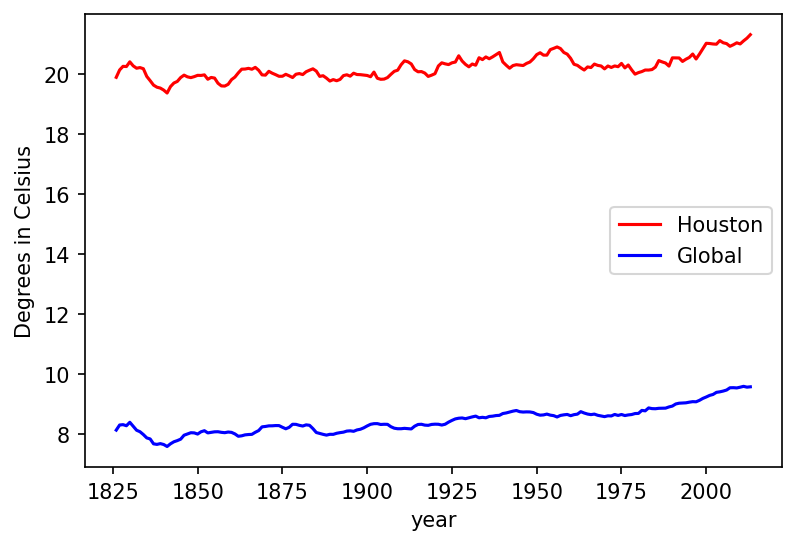

In [47]:
# Compare datasets

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

axis = plt.gca()
axis.set(ylabel='Degrees in Celsius')
houston_data.plot(kind='line', x='year', y='moving_avg', color='red', ax=axis, label='Houston')
global_data.plot(kind='line', x='year', y='moving_avg', color='blue', ax=axis, label='Global')
plt.show()